# Customer segmentation (basic)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import pandas as pd

import missingno as msno

import seaborn as sns

sns.set(style='white')

In [2]:
df_raw = pd.read_csv(
    "data/mall_customers.csv"
)

In [3]:
df_raw.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df = df_raw.copy()

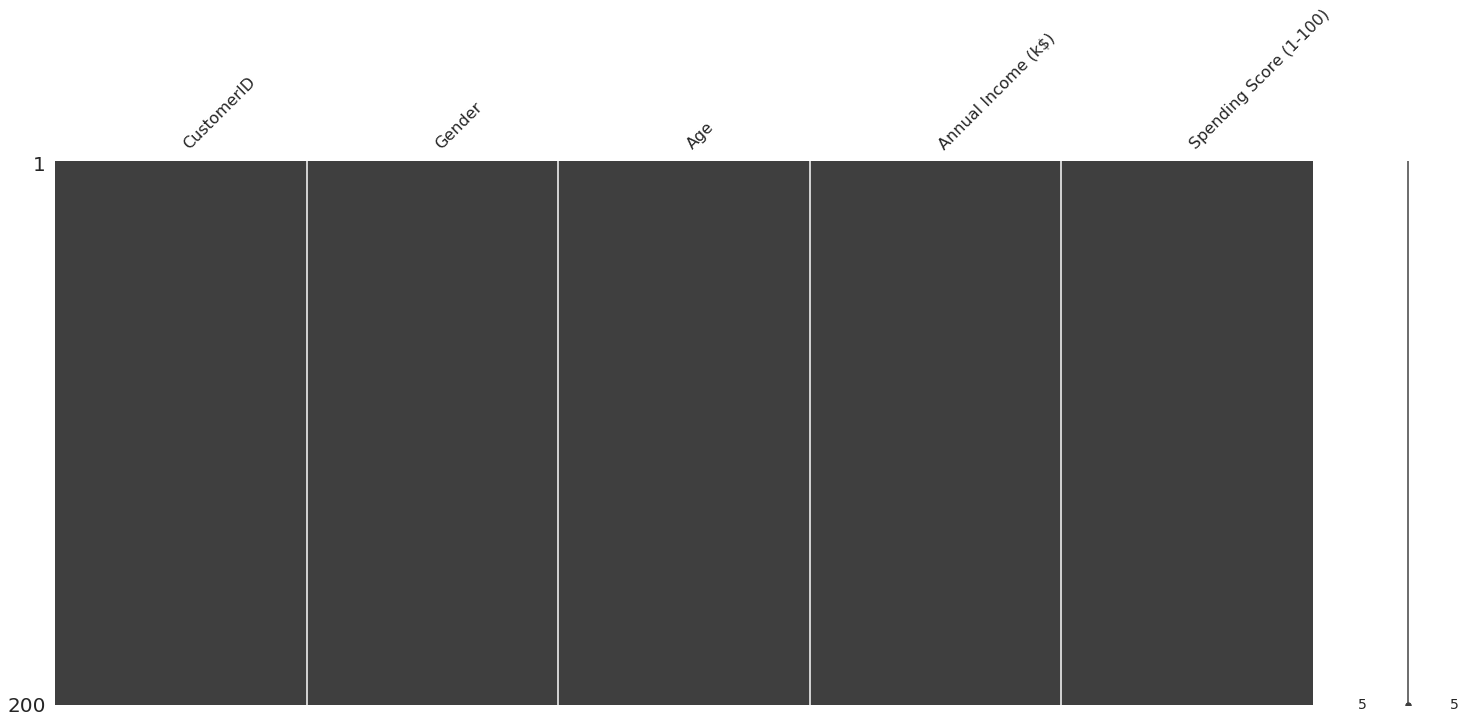

In [5]:
msno.matrix(df)

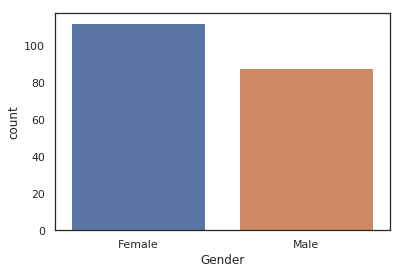

In [9]:
sns.countplot(x="Gender", data=df, order=['Female', 'Male'])

[Text(0, 0.5, 'Percent')]

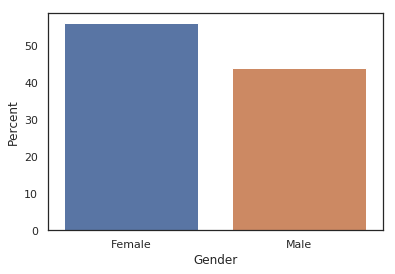

In [11]:
ax = sns.barplot(x="Gender", y="CustomerID", data=df, order=['Female', 'Male'], estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

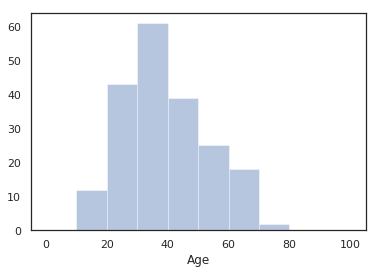

In [28]:
ax = sns.distplot(df['Age'], bins=10, kde=False, hist_kws={"range": [0,100]})

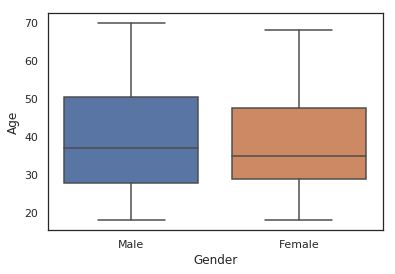

In [31]:
sns.boxplot(y='Age', x='Gender', data=df)

In [39]:
df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max()

(15, 137)

In [41]:
def convert_annual_income(val):
    if(val < 20):
        return "0-20"
    elif(val < 40):
        return "20-40"
    elif(val < 60):
        return "40-60"
    elif(val < 80):
        return "60-80"
    elif(val < 100):
        return "80-100"
    
    return "> 100"

df['annual income class (k$)'] = df['Annual Income (k$)'].apply(convert_annual_income)

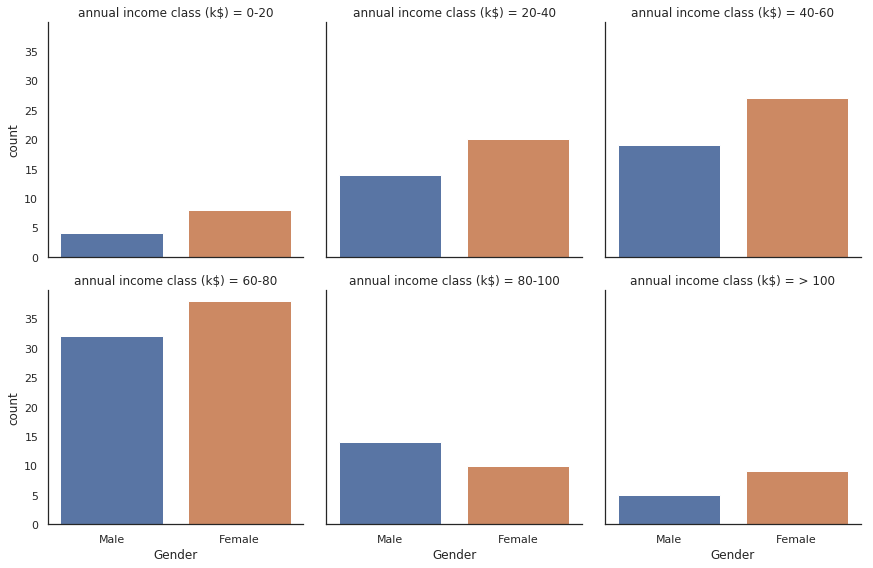

In [51]:
g = sns.catplot("Gender", col="annual income class (k$)", col_wrap=3, data=df, kind="count", height=4, aspect=1)